# 🚆 Indian Railway Ticket Reservation System

## 📘 Project Overview

This project is a comprehensive **SQL-based database schema** for an **Indian Railway Ticket Reservation System** developed as part of the CS2202 Mini Project. It models various aspects of railway operations, including train management, ticket booking, passenger details, payment processing, and seat availability.

---

## 🗂️ Database: `railway_reservation`

The project includes the creation of a MySQL database named `railway_reservation` along with well-structured tables and relationships between them.

---
## 🗂️ ER Diagram:

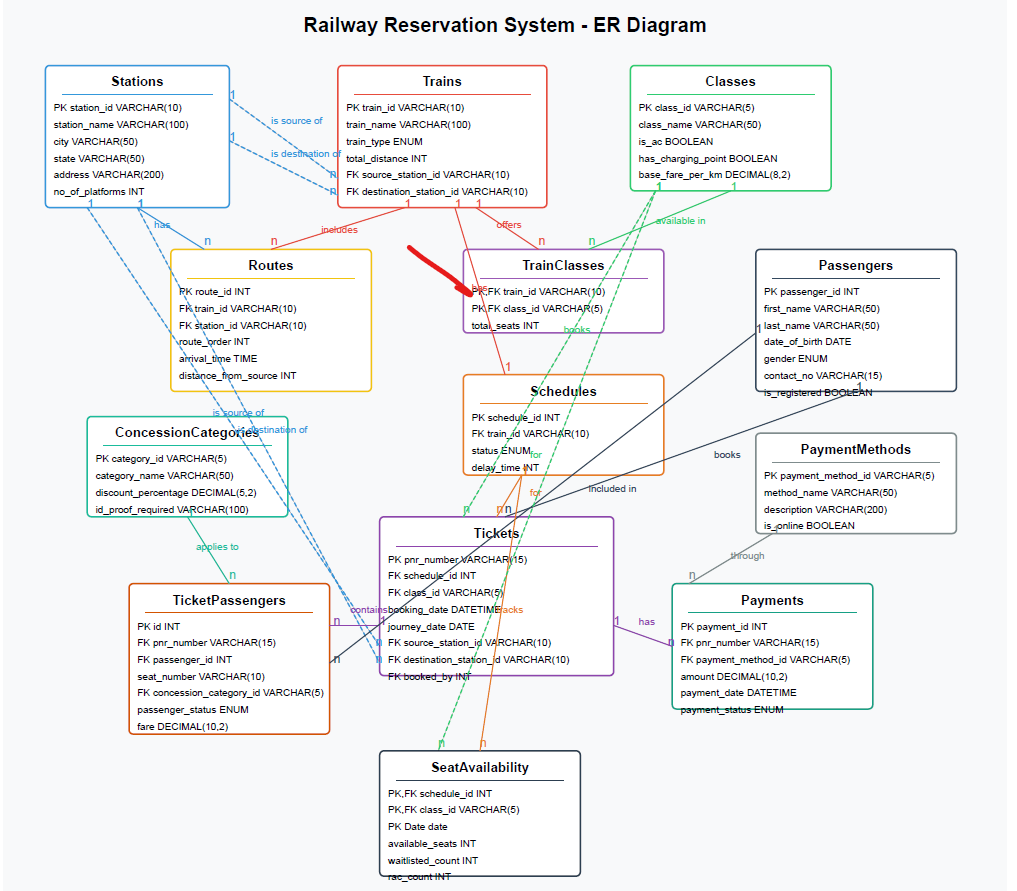

## 📑 Table Structure

### 1. **Stations**
Stores details about railway stations.

- `station_id` (PK)
- `station_name`, `city`, `state`, `address`
- `no_of_platforms`, `has_waiting_room`, `has_wifi`

### 2. **Trains**
Details about different trains.

- `train_id` (PK), `train_name`, `train_type`
- `total_distance`, `avg_speed`, `has_pantry`
- `source_station_id`, `destination_station_id` (FK → Stations)

### 3. **Classes**
Information on different travel classes.

- `class_id` (PK), `class_name`, `is_ac`
- `base_fare_per_km`, `has_charging_point`, `has_bedding`

### 4. **TrainClasses**
Mapping of classes available in each train.

- Composite PK: `train_id`, `class_id`
- `total_seats`
- FK references: Trains, Classes

### 5. **Routes**
Stops and timings for trains.

- `route_id` (PK, Auto Increment), `train_id` (FK), `station_id` (FK)
- `arrival_time`, `departure_time`, `halt_time`
- `route_order`, `distance_from_source`, `day_number`

### 6. **Schedules**
Status and schedule info for trains.

- `schedule_id` (PK), `train_id` (FK)
- `status`, `delay_time`, `remarks`

### 7. **ConcessionCategories**
Discounts and offers for special passenger categories.

- `category_id` (PK), `category_name`, `discount_percentage`
- `id_proof_required`, `description`

### 8. **Passengers**
Passenger profile details.

- `passenger_id` (PK), `first_name`, `last_name`, `date_of_birth`, `gender`
- `contact_no`, `email`, `address`
- `is_registered`, `username`, `password_hash`, `date_registered`

### 9. **PaymentMethods**
Supported modes of payment.

- `payment_method_id` (PK), `method_name`, `is_online`

### 10. **Tickets**
Details of tickets booked.

- `pnr_number` (PK), `schedule_id`, `class_id`, `journey_date`
- `source_station_id`, `destination_station_id` (FKs → Stations)
- `booked_by` (FK → Passengers), `booking_status`, `ticket_type`
- `agent_id`, `cancellation_date`, `refund_amount`, `refund_status`

### 11. **TicketPassengers**
Links passengers to their booked tickets.

- `id` (PK, Auto Increment), `pnr_number` (FK), `passenger_id` (FK)
- `seat_number`, `concession_category_id` (FK)
- `passenger_status`, `waitlist_position`, `fare`

### 12. **Payments**
Records of ticket payments.

- `payment_id` (PK), `pnr_number` (FK), `payment_method_id` (FK)
- `amount`, `payment_date`, `payment_status`, `transaction_id`

### 13. **SeatAvailability**
Tracks seats available per schedule and class.

- Composite PK: `schedule_id`, `class_id`, `Date`
- `available_seats`, `waitlisted_count`, `rac_count`, `last_updated`

---

This document provides an overview of the main stored procedures, functions, triggers, and utility queries implemented in our Railway Reservation System database.

## Table of Contents
1. [Stored Procedures](#stored-procedures)
2. [Functions](#functions)
3. [Triggers](#triggers)
4. [Sample Queries](#sample-queries)
5. [Additional Utilities](#additional-utilities)

## Stored Procedures

### 1. `GetPNRStatus`
**Description:** Retrieves detailed information about a ticket using its PNR number.
**Usage:** `CALL GetPNRStatus('PNR1234567890');`
**Features:**
- Returns complete ticket information including passenger details
- Shows journey information (train, class, date, source, destination)
- Displays booking status and seat/waitlist information

### 2. `GetTrainSchedule`
**Description:** Retrieves the complete schedule of a train.
**Usage:** `CALL GetTrainSchedule('TRN12345');`
**Features:**
- Lists all stations on the train's route
- Shows arrival and departure times
- Includes halt time, distance from source, and day number information

### 3. `ListPassengersOnTrain`
**Description:** Lists all confirmed and RAC passengers on a specific train for a given date.
**Usage:** `CALL ListPassengersOnTrain('TRN12345', '2025-05-15');`
**Features:**
- Shows passenger names, gender, and seat numbers
- Includes class information and station details
- Only lists confirmed and RAC passengers (excludes waitlisted and cancelled)

### 4. `GetWaitlistedPassengers`
**Description:** Lists all waitlisted passengers for a particular train.
**Usage:** `CALL GetWaitlistedPassengers('TRN12345', '2025-05-15');`
**Features:**
- Shows waitlisted passengers with their contact information
- Lists waitlist positions for prioritization

### 5. `CalculateTrainCancellationRefund`
**Description:** Calculates the total refund amount for cancelling a train and lists affected tickets.
**Usage:** `CALL CalculateTrainCancellationRefund('TRN12345', '2025-05-15', @refund_amount);`
**Features:**
- Returns total refund amount for all affected tickets
- Provides detailed information about affected passengers
- Excludes already cancelled or refunded tickets

### 6. `GetRevenueSummary`
**Description:** Provides a summary of revenue generated within a specified period.
**Usage:** `CALL GetRevenueSummary('2025-01-01', '2025-03-31');`
**Features:**
- Shows total revenue, number of tickets sold
- Includes period start and end dates

### 7. `GetCancellationRecords`
**Description:** Retrieves cancellation records for a specified time period.
**Usage:** `CALL GetCancellationRecords('2025-01-01', '2025-03-31');`
**Features:**
- Shows detailed information about cancelled tickets
- Includes refund amounts and status

### 8. `GetBusiestRoutes`
**Description:** Identifies the busiest routes based on passenger count.
**Usage:** `CALL GetBusiestRoutes('2025-01-01', '2025-03-31', 10);`
**Features:**
- Returns top routes by passenger count
- Allows specifying time period and number of top routes to return

### 9. `GetItemizedBill`
**Description:** Generates an itemized bill for a ticket with all charges.
**Usage:** `CALL GetItemizedBill('PNR1234567890');`
**Features:**
- Shows detailed fare breakdown
- Includes premium charges for Tatkal tickets
- Shows payment method and status

### 10. `BookTicket`
**Description:** Books a new ticket in the system with proper status management.
**Usage:** `CALL BookTicket(passenger_id, class_id, schedule_id, journey_date, source_station_id, destination_station_id, payment_method_id, ticket_type, concession_category_id, @pnr_number, @status);`
**Features:**
- Generates unique PNR number
- Calculates fare based on distance and class
- Applies concession discounts if applicable
- Manages seat allocation and waitlist status
- Records payment information

### 11. `CancelTicket`
**Description:** Cancels a ticket and calculates refund amount.
**Usage:** `CALL CancelTicket('PNR1234567890');`
**Features:**
- Updates seat availability
- Calculates refund amount based on cancellation date
- Updates ticket and passenger status
- Processes refund initiation

### 12. `GetMonthlyRevenueByClass`
**Description:** Provides monthly revenue analysis by train class.
**Usage:** `CALL GetMonthlyRevenueByClass();`
**Features:**
- Shows revenue trends over time
- Breaks down revenue by class
- Includes ticket count information

## Functions

### 1. `GetSeatAvailabilityJSON`
**Description:** Returns seat availability information in JSON format.
**Usage:** `SELECT GetSeatAvailabilityJSON('TRN12345', '2025-05-15', 'SL') AS availability;`
**Features:**
- Returns available seats, waitlisted count, and RAC count
- Data returned as structured JSON for easy parsing

## Triggers

### 1. `after_ticket_insert`
**Description:** Updates seat availability counts after a ticket is inserted.
**Features:**
- Automatically adjusts available seats, waitlist count, or RAC count
- Maintains data consistency across related tables
- Triggered after each new ticket creation

## Sample Queries

### 1. PNR Status Tracking
```sql
CALL GetPNRStatus('PNR1234567890');
```

### 2. Train Schedule Lookup
```sql
CALL GetTrainSchedule('TRN12345');
```

### 3. Available Seats Query
```sql
SELECT CheckSeatAvailability('TRN12345', '2025-05-15', 'SL') AS available_seats;
```

### 4. List Passengers on Train
```sql
CALL ListPassengersOnTrain('TRN12345', '2025-05-15');
```

### 5. Retrieve Waitlisted Passengers
```sql
CALL GetWaitlistedPassengers('TRN12345', '2025-05-15');
```

## Additional Utilities

### 1. Monthly Revenue Analysis by Train Class
```sql
CALL GetMonthlyRevenueByClass();
```

### 2. Trains with Highest Cancellation Rates
```sql
SELECT 
    tr.train_id,
    tr.train_name,
    COUNT(DISTINCT t.pnr_number) AS total_bookings,
    SUM(CASE WHEN t.booking_status = 'Cancelled' THEN 1 ELSE 0 END) AS cancellations,
    ROUND(SUM(CASE WHEN t.booking_status = 'Cancelled' THEN 1 ELSE 0 END) * 100.0 / COUNT(DISTINCT t.pnr_number), 2) AS cancellation_rate
FROM Tickets t
JOIN Schedules sc ON t.schedule_id = sc.schedule_id
JOIN Trains tr ON sc.train_id = tr.train_id
WHERE t.journey_date BETWEEN '2025-01-01' AND '2026-03-31'
GROUP BY tr.train_id, tr.train_name
HAVING COUNT(DISTINCT t.pnr_number) > 10
ORDER BY cancellation_rate DESC
LIMIT 10;
```

### 3. Average Occupancy by Day of Week
```sql
SELECT 
    DAYNAME(t.journey_date) AS day_of_week,
    c.class_name,
    AVG(CASE 
        WHEN tc.total_seats > 0 THEN 
            (CAST(COUNT(tp.id) AS DECIMAL) / tc.total_seats) * 100
        ELSE 0
    END) AS avg_occupancy_percentage
FROM Tickets t
JOIN TicketPassengers tp ON t.pnr_number = tp.pnr_number
JOIN Schedules sc ON t.schedule_id = sc.schedule_id
JOIN Classes c ON t.class_id = c.class_id
JOIN TrainClasses tc ON sc.train_id = tc.train_id AND c.class_id = tc.class_id
WHERE tp.passenger_status IN ('Confirmed', 'RAC')
  AND t.journey_date BETWEEN '2025-01-01' AND '2025-03-31'
GROUP BY DAYNAME(t.journey_date), c.class_name
ORDER BY FIELD(day_of_week, 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), c.class_name;
```

### 4. Concession Statistics
```sql
SELECT 
    cc.category_name,
    COUNT(tp.id) AS passenger_count,
    SUM(tp.fare) AS total_fare,
    AVG(cc.discount_percentage) AS avg_discount_percentage
FROM TicketPassengers tp
JOIN ConcessionCategories cc ON tp.concession_category_id = cc.category_id
WHERE tp.passenger_status != 'Cancelled'
GROUP BY cc.category_name
ORDER BY passenger_count DESC;
```

### 5. Trains Running at Full Capacity
```sql
SELECT 
    tr.train_id,
    tr.train_name,
    sc.departure_date,
    c.class_name,
    tc.total_seats,
    COUNT(tp.id) AS booked_seats,
    (tc.total_seats - COUNT(tp.id)) AS remaining_seats
FROM Trains tr
JOIN Schedules sc ON tr.train_id = sc.train_id
JOIN TrainClasses tc ON tr.train_id = tc.train_id
JOIN Classes c ON tc.class_id = c.class_id
JOIN Tickets t ON sc.schedule_id = t.schedule_id AND t.class_id = c.class_id
JOIN TicketPassengers tp ON t.pnr_number = tp.pnr_number
WHERE tp.passenger_status IN ('Confirmed', 'RAC')
  AND sc.departure_date BETWEEN CURDATE() AND DATE_ADD(CURDATE(), INTERVAL 7 DAY)
GROUP BY tr.train_id, tr.train_name, sc.departure_date, c.class_name, tc.total_seats
HAVING (tc.total_seats - COUNT(tp.id)) <= 5
ORDER BY sc.departure_date, remaining_seats;
```

---

This documentation provides an overview of the key database components. For detailed implementation, please refer to the SQL files in the repository.

## ✅ Features

- Normalized schema design
- Foreign key constraints ensure referential integrity
- Covers complete reservation pipeline: station ➝ train ➝ class ➝ ticket ➝ passenger ➝ payment
- Handles concessions, cancellations, refunds
- RAC and waitlist management

---

## 🛠️ Technologies Used

- **Database:** MySQL
- **Language:** SQL (DDL + DML)
- **Tools:** MySQL Workbench / phpMyAdmin (for visualization)

---

## 📦 How to Use

1. **Clone or download** this repository.
2. Import the `.sql` file into your MySQL server.
3. Run the script using MySQL Workbench or any compatible client.
4. Extend with queries to insert, update, search, and manage bookings.

---

## 📌 Future Scope

- Add stored procedures for booking and cancellation
- Integrate with a web frontend (PHP, Python Flask/Django)
- Implement triggers for auto seat update
- Optimize indexing and query performance

---

## 👨‍💻 Developed By

- **Sparsh Rastogi**
- **Abhay Sahni**
- **Ansh Prem**
- **Saksham Srivastava**
  
CS2202 Mini Project – Indian Railways Ticket Reservation System  
IIT Patna

---

## 📝 License

This project is for academic use only. Commercial use or distribution is not permitted without permission.

---